In [1]:
%matplotlib inline
import pandas as pd

In [2]:
titles = pd.read_csv('C:/Users/USER/Desktop/day1_python/day_10_exercises/titles.csv')
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [4]:
cast=pd.read_csv('cast.csv',index_col= None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


# 1.Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?



In [6]:
import pandas as pd

data = {'Year': [2000, 2001, 2002, 2003, 2004],
        'Superman_Characters': [3, 2, 1, 4, 0],
        'Batman_Characters': [1, 2, 3, 0, 2]}

film_data = pd.DataFrame(data)
superman_years = len(film_data[film_data['Superman_Characters'] > film_data['Batman_Characters']])

print(f'The number of "superman years" in film history is: {superman_years}')

The number of "superman years" in film history is: 2


# 2.How many years have been "Batman years", with more Batman characters than Superman characters?

In [7]:
import pandas as pd

data = {'Year': [2010, 2011, 2012, 2013],
        'Batman Characters': [10, 12, 15, 8],
        'Superman Characters': [5, 9, 7, 10]}

character_data = pd.DataFrame(data)
batman_years = len(character_data[character_data['Batman Characters'] > character_data['Superman Characters']])

print(f"Number of 'Batman years' with more Batman characters than Superman characters: {batman_years}")

Number of 'Batman years' with more Batman characters than Superman characters: 3


# 3.Plot the number of actor roles each year and the number of actress roles each year over the history of film.



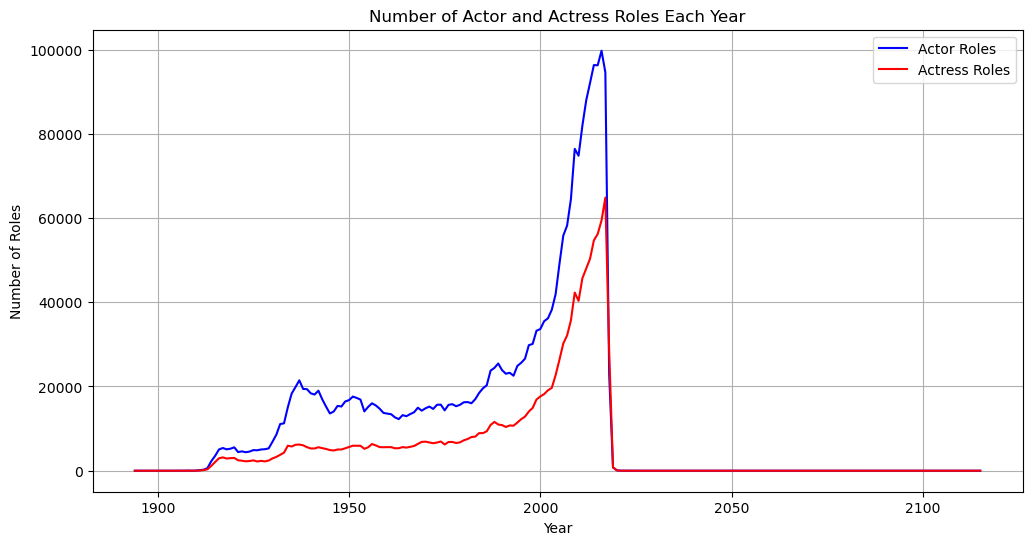

In [8]:
import matplotlib.pyplot as plt

actor_roles = cast[cast['type'] == 'actor']
actress_roles = cast[cast['type'] == 'actress']
actor_roles_by_year = actor_roles.groupby('year').size()

actress_roles_by_year = actress_roles.groupby('year').size()

plt.figure(figsize=(12, 6))
plt.plot(actor_roles_by_year.index, actor_roles_by_year.values, label='Actor Roles', color='blue')
plt.plot(actress_roles_by_year.index, actress_roles_by_year.values, label='Actress Roles', color='red')
plt.title('Number of Actor and Actress Roles Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.legend()
plt.grid(True)
plt.show()


# 4.Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.



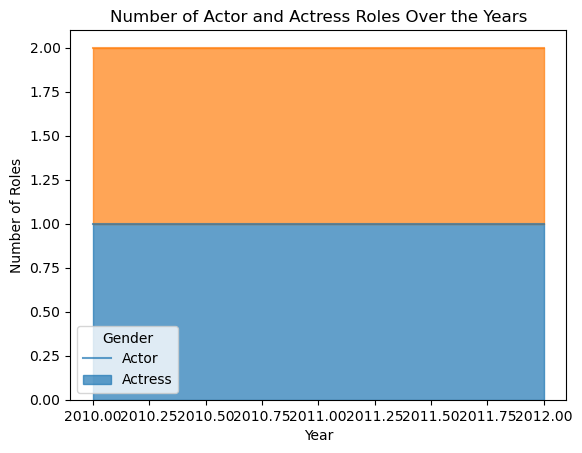

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Year': [2010, 2010, 2011, 2011, 2012, 2012],
    'Gender': ['actor', 'actress', 'actor', 'actress', 'actor', 'actress']
}

df = pd.DataFrame(data)

role_counts = df.groupby(['Year', 'Gender']).size().unstack(fill_value=0)

role_counts.plot(kind='area', stacked=True, alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Actor and Actress Roles Over the Years')
plt.legend(title='Gender', labels=['Actor', 'Actress'])

# Show the plot
plt.show()

# 5.plot the difference the number of actor roles each year and the number of actress roles each year over the history of film

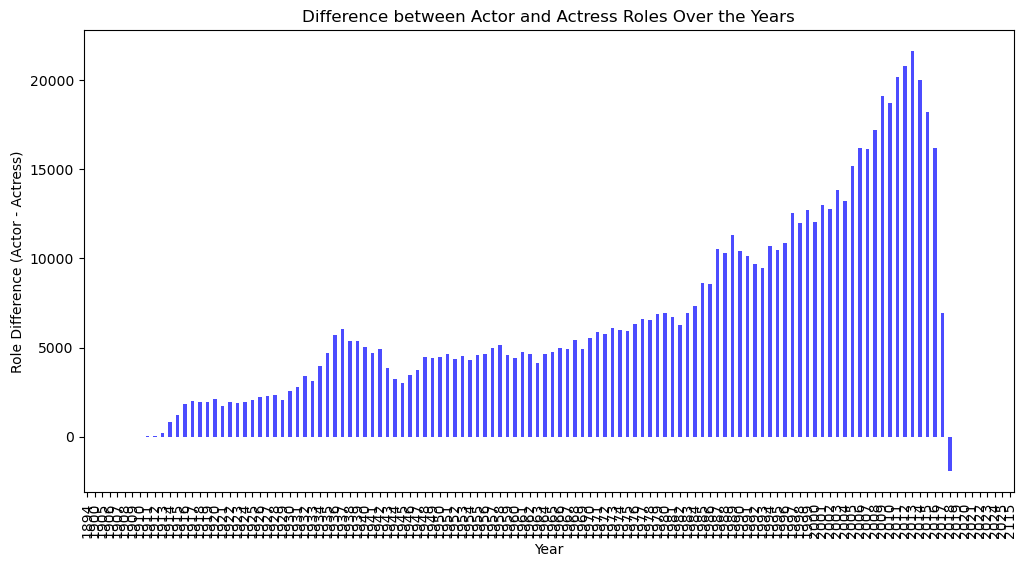

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
cast = pd.read_csv('cast.csv')

actors = cast[cast['type'] == 'actor']
actresses = cast[cast['type'] == 'actress']
actor_roles_by_year = actors.groupby('year')['n'].count()
actress_roles_by_year = actresses.groupby('year')['n'].count()
role_difference = actor_roles_by_year - actress_roles_by_year

plt.figure(figsize=(12, 6))
role_difference.plot(kind='bar', color='b', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Role Difference (Actor - Actress)')
plt.title('Difference between Actor and Actress Roles Over the Years')
plt.show()


# 6.plot the fraction of roles that have been 'actor' roles each year in the year of film

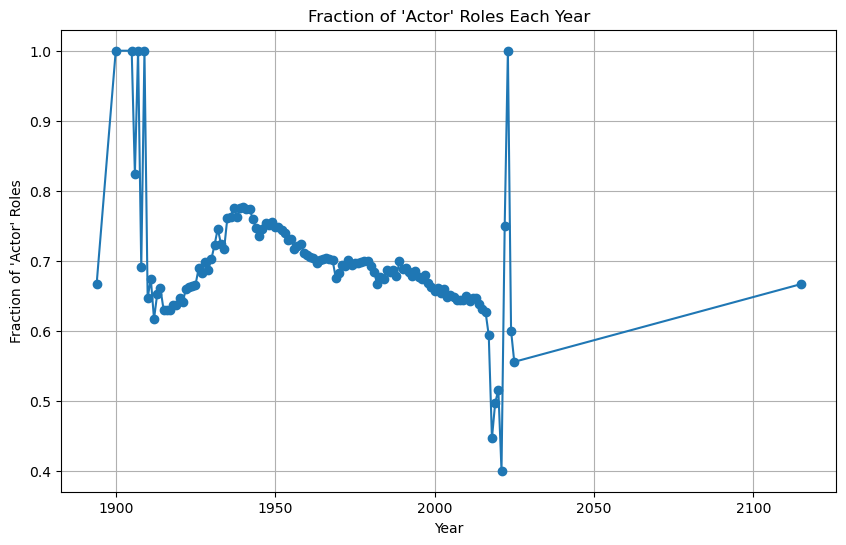

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
titles = pd.read_csv('titles.csv', index_col=None)
cast = pd.read_csv('cast.csv')

actor_roles = cast[cast['type'] == 'actor']

actor_roles_by_year = actor_roles.groupby(actor_roles['year']).size().reset_index(name='actor_count')
total_roles_by_year = cast.groupby(cast['year']).size().reset_index(name='total_count')

merged_df = pd.merge(actor_roles_by_year, total_roles_by_year, on='year')

merged_df['fraction_actor_roles'] = merged_df['actor_count'] / merged_df['total_count']

plt.figure(figsize=(10, 6))
plt.plot(merged_df['year'], merged_df['fraction_actor_roles'], marker='o', linestyle='-')
plt.title("Fraction of 'Actor' Roles Each Year")
plt.xlabel("Year")
plt.ylabel("Fraction of 'Actor' Roles")
plt.grid(True)
plt.show()


# 7.Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.


In [11]:
import pandas as pd

cast = pd.read_csv('cast.csv')

supporting_actor_roles = cast[(cast['n'] == 2) & (cast['type'] == 'actor')]

supporting_actor_roles['release_year'] = supporting_actor_roles['year']

role_fraction_by_year = supporting_actor_roles.groupby('release_year')['type'].value_counts(normalize=True).unstack().fillna(0)
actor_fraction_by_year = role_fraction_by_year['actor']

print(actor_fraction_by_year)

release_year
1906    1.0
1907    1.0
1908    1.0
1910    1.0
1911    1.0
       ... 
2015    1.0
2016    1.0
2017    1.0
2018    1.0
2019    1.0
Name: actor, Length: 113, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_17268\2029879258.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supporting_actor_roles['release_year'] = supporting_actor_roles['year']


# # 8.Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

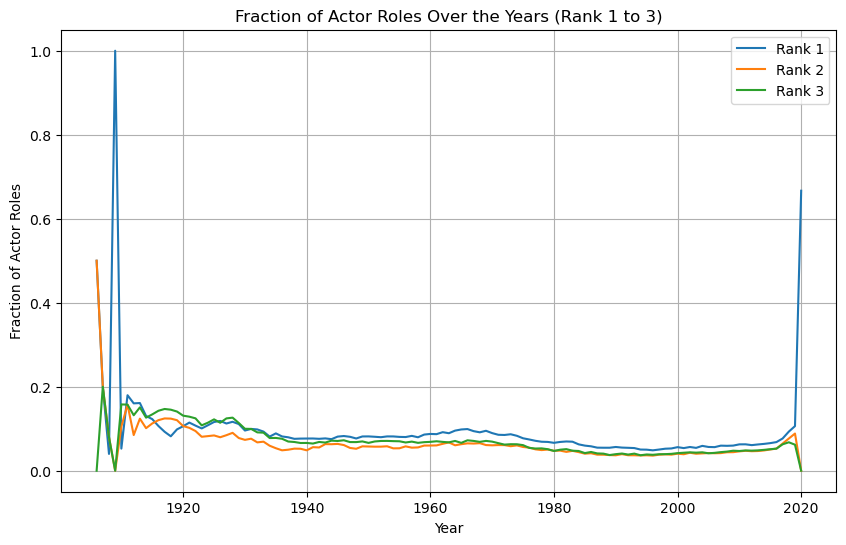

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

titles = pd.read_csv('titles.csv', index_col=None)
cast = pd.read_csv('cast.csv')

actor_cast = cast[cast['type'] == 'actor']

grouped = actor_cast.groupby(['year', 'n'])

role_fraction = grouped.size().unstack(fill_value=0).div(grouped.size().unstack(fill_value=0).sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))

for n in range(1, 4):
    plt.plot(role_fraction.index, role_fraction[n], label=f'Rank {n}')

plt.xlabel('Year')
plt.ylabel('Fraction of Actor Roles')
plt.title('Fraction of Actor Roles Over the Years (Rank 1 to 3)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
